<a href="https://colab.research.google.com/github/Javier-CN/IA_begining/blob/main/Proyecto_final_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WORK IN PROGRESS...

# **Identificacion de cuentas falsas y Fake news ***

Ambas partes de este proyecto estan enfocadas las redes sociales desde detectar bots o cuentas falsas que muchas veces se utilizan para propositos poco honestos. Otro problema con las redes sociales son las Fake News, si bien es muy facil detercatr una talvez comprobando si esta viene de uan fuente confiable la verdad es que internet esta plagado de ellas y los usuarios pocas veces se detienen a comprobar su veracidad y se esparcen como "chismes"
---


# *** 1 Primera parte ***
*** La primer parte del proyecto se centra en la ifnormacion acerca de cuentas falsas y verdaderas de Instagram, los datos los obtuve de Kaggle ***

---



1 Explicacion del problema

---
El database consiste en los siguientes INPUTS


1.   **PROFILE PICTURE** - Se tiene foto de perfil o no.
2.   **NUMS/LENGTH USERNAM**E - Porcentaje de caracteres numericos en el username.
3.  **FULLNAME WORDS**
4.   **NAME/LENGTH OF FULL NAME** - Porcentaje de caracteres numericos en el fullname
5.   **NAME == USERNAME** - Muestra si el username y fullname son iguales
6.   **DESCRIPTION LENGTH** - Longitud de la descripcion.
7.   **EXTERNAL URL** - El perfil tiene una URL externa o no.
8.   **PRIVATE** - La cuenta es privada o no.
9.   **POSTS** - Numero de posts.
10.  **FOLLOWERS** - Numero de seguidores.
11.  **FOLLOWS** - Numero de seguidos.

El OUTPUTS se un numero que indique si la cuenta es falsa o verdadera

El database esta en:https://www.kaggle.com/datasets/free4ever1/instagram-fake-spammer-genuine-accounts










2.- Analisis exploratorio de datos
---
*** Primero se incluyen todas las librerias necesarias para esta sección***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix


In [ ]:
#Se cargan los datos
instagram_df_test = pd.read_csv('test.csv')
instagram_df_train = pd.read_csv('train.csv')

In [ ]:
#Obtenemos un preview de lso datos
instagram_df_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [ ]:
instagram_df_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1


In [ ]:
#Obtenemos informacion general de estos dataframe con el atrubuto info, ademas veamos si hay NaN´s
instagram_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [ ]:
instagram_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           120 non-null    int64  
 1   nums/length username  120 non-null    float64
 2   fullname words        120 non-null    int64  
 3   nums/length fullname  120 non-null    float64
 4   name==username        120 non-null    int64  
 5   description length    120 non-null    int64  
 6   external URL          120 non-null    int64  
 7   private               120 non-null    int64  
 8   #posts                120 non-null    int64  
 9   #followers            120 non-null    int64  
 10  #follows              120 non-null    int64  
 11  fake                  120 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 11.4 KB


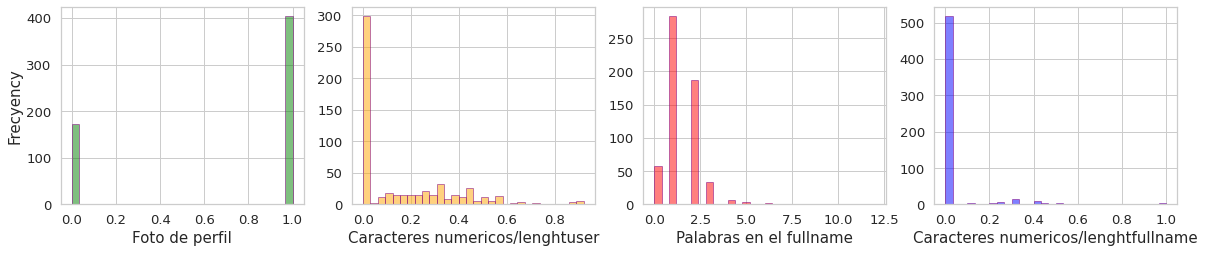

In [ ]:
#Ahora hacemos algunos histogramas
plt.figure(figsize=(20,8))

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(instagram_df_train["profile pic"], bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('Foto de perfil', size=15)
ax1.set_ylabel('Frecyency', size=15)

ax2.hist(instagram_df_train["nums/length username"], bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('Caracteres numericos/lenghtuser', size=15)

ax3.hist(instagram_df_train["fullname words"], bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('Palabras en el fullname', size=15)

ax4.hist(instagram_df_train["nums/length fullname"], bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('Caracteres numericos/lenghtfullname', size=15);

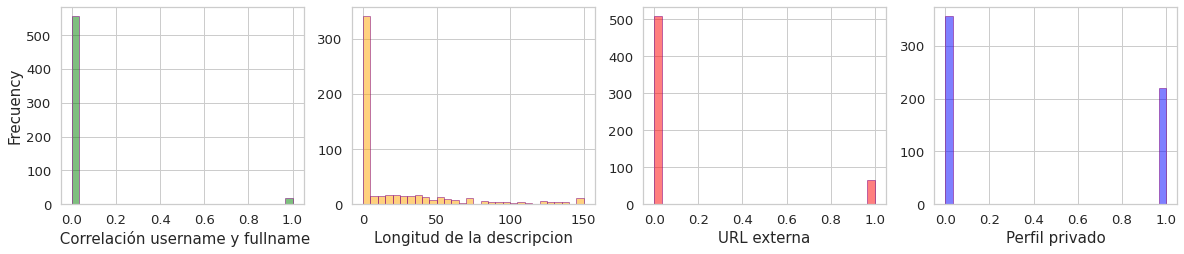

In [ ]:
plt.figure(figsize=(20,8))

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(instagram_df_train["name==username"], bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel(' Correlación username y fullname', size=15)
ax1.set_ylabel('Frecuency', size=15)

ax2.hist(instagram_df_train["description length"], bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('Longitud de la descripcion', size=15)

ax3.hist(instagram_df_train["external URL"], bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('URL externa', size=15)

ax4.hist(instagram_df_train["private"], bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('Perfil privado', size=15);

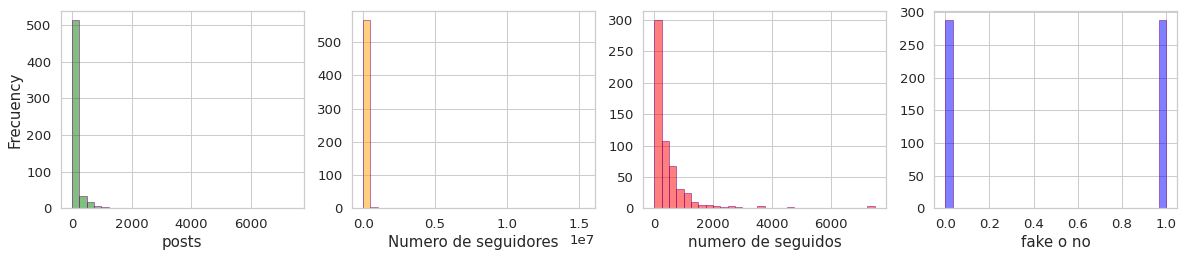

In [ ]:
plt.figure(figsize=(20,8))

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(instagram_df_train["#posts"], bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('posts', size=15)
ax1.set_ylabel('Frecuency', size=15)

ax2.hist(instagram_df_train["#followers"], bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('Numero de seguidores', size=15)

ax3.hist(instagram_df_train["#follows"], bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('numero de seguidos', size=15)

ax4.hist(instagram_df_train["fake"], bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('fake o no', size=15);

3.-Preparacion de los datos

---



In [ ]:
#Los INPUTS seran todos los campos exepto el que nos dice si la cuenta es real o no
x_train = instagram_df_train.drop(columns = ['fake'])
x_test = instagram_df_test.drop(columns = ['fake'])


In [ ]:
#El output sera la columna fake que antes dropeamos
y_train = instagram_df_train['fake']
y_test = instagram_df_test['fake']

In [ ]:
#Con esta funcion normalizamos todos los datos
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(x_train)
X_test = scaler_x.transform(x_test)

In [ ]:
#Vamos a convertir los outputs en la represenatcion one-hot, esta vez solo tenemos 2 categorias fake or not
Y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [ ]:
#Veamos la forma que tienen nuestros arreglos
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((576, 11), (120, 11), (576, 2), (120, 2))

4.-Implementación de la red neuronal

---



In [ ]:
#Comenzamos definiendo la arquitectura empleada

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
def architecture(input_shape, activation,dropout=False, batch_normalization=False):

    model = Sequential()
    model.add(Dense(50,input_dim = 11, activation = activation)) #Initial Layer
    if batch_normalization:
        model.add(BatchNormalization())
    if dropout:
        model.add(Dropout(0.30))
    model.add(Dropout(0.3))
    model.add(Dense(150, activation = activation))
    if batch_normalization:
        model.add(BatchNormalization())
    if dropout:
        model.add(Dropout(0.30))
    model.add(Dropout(0.3))
    model.add(Dense(25, activation = activation))
    if batch_normalization:
        model.add(BatchNormalization())
    if dropout:
        model.add(Dropout(0.30))
    model.add(Dropout(0.3))
    model.add(Dense(2, activation = "softmax")) #output layer

    return model

In [ ]:
input_shape = (11,)
activation = 'tanh'

model_keras = architecture(input_shape=input_shape, activation=activation)
model_keras.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 50)                600       
                                                                 
 dropout_9 (Dropout)         (None, 50)                0         
                                                                 
 dense_28 (Dense)            (None, 150)               7650      
                                                                 
 dropout_10 (Dropout)        (None, 150)               0         
                                                                 
 dense_29 (Dense)            (None, 25)                3775      
                                                                 
 dropout_11 (Dropout)        (None, 25)                0         
                                                                 
 dense_30 (Dense)            (None, 2)                

In [ ]:
#Comnpilamos el modelo
lr = 0.001
opt = Adam(learning_rate=lr)
loss = tf.keras.losses.MeanSquaredError()


model_keras.compile(loss=loss, optimizer=opt, metrics=['accuracy'])


In [ ]:
#Finalmente lo entrenamos
import time
epochs = 200
start_time = time.time()
val_split=0.1

history_model = model_keras.fit(X_train, Y_train,
                          epochs=epochs,
                          batch_size=32,
                          validation_split=val_split,
                          shuffle=True,
                          verbose=1)




end_time = time.time()
print("Time for training: {:10.4f}s".format(end_time - start_time))

Epoch 1/200
17/17 [==============================] - 1s 12ms/step - loss: 0.2235 - accuracy: 0.6583 - val_loss: 0.1858 - val_accuracy: 0.7759
Epoch 2/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1567 - accuracy: 0.8282 - val_loss: 0.1237 - val_accuracy: 0.8448
Epoch 3/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1262 - accuracy: 0.8649 - val_loss: 0.0976 - val_accuracy: 0.8448
Epoch 4/200
17/17 [==============================] - 0s 4ms/step - loss: 0.0997 - accuracy: 0.8900 - val_loss: 0.0929 - val_accuracy: 0.8448
Epoch 5/200
17/17 [==============================] - 0s 4ms/step - loss: 0.0883 - accuracy: 0.8900 - val_loss: 0.0832 - val_accuracy: 0.8448
Epoch 6/200
17/17 [==============================] - 0s 6ms/step - loss: 0.0783 - accuracy: 0.9035 - val_loss: 0.0831 - val_accuracy: 0.8448
Epoch 7/200
17/17 [==============================] - 0s 4ms/step - loss: 0.0846 - accuracy: 0.8919 - val_loss: 0.0748 - val_accuracy: 0.8621
Epoch 8/200


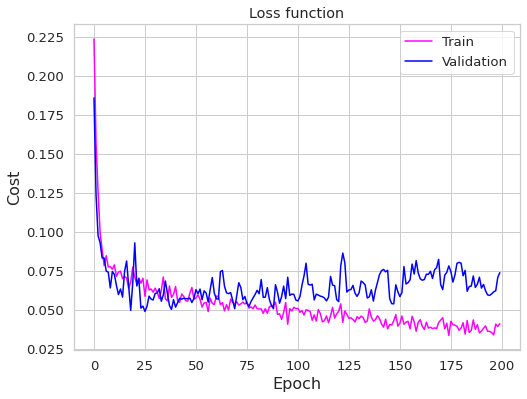

In [ ]:
#Graficamos las perdidas
plt.figure(figsize=(8,6))

plt.plot(history_model.history['loss'], 'magenta')
plt.plot(history_model.history['val_loss'], 'blue')
plt.title('Loss function')
plt.ylabel('Cost', size=16)
plt.xlabel('Epoch', size=16)
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
model_keras.metrics_names

['loss', 'accuracy']

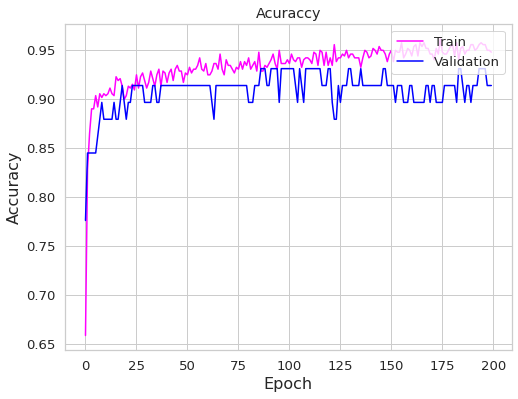

In [ ]:
#Graficamos el accuracy
plt.figure(figsize=(8,6))

plt.plot(history_model.history['accuracy'], 'magenta')
plt.plot(history_model.history['val_accuracy'], 'blue')
plt.title('Acuraccy')
plt.ylabel('Accuracy', size=16)
plt.xlabel('Epoch', size=16)
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
#Evaluamos el modelo con los test
model_keras.evaluate(X_test, Y_test)


4/4 [==============================] - 0s 3ms/step - loss: 0.0965 - accuracy: 0.8750


[0.09649278968572617, 0.875]

5.- Inferencia

---



In [ ]:
predicted = model_keras.predict(X_test)
predicted_value = []
test = []
for i in predicted:
    predicted_value.append(np.argmax(i))

for i in Y_test:
    test.append(np.argmax(i))

4/4 [==============================] - 0s 2ms/step


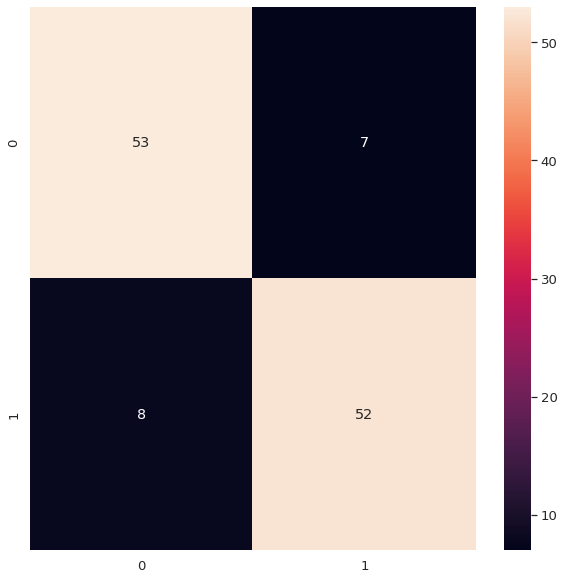

In [ ]:
#Veamos de las inferencias cuantas estan bein con una matriz de error
plt.figure(figsize=(10, 10))
con_matrix = confusion_matrix(test,predicted_value)
sns.heatmap(con_matrix, annot=True)

6.-Comentarios


---
El modelo funciona satisfactoriamente con la configuracion dada,se pueden implementar otras redes y variantes, en este caso no lo hice para darle mas tiempo a la segunda parte del proyecto.



---


# *** 2 Segunda parte ***
*** Esta segunda parte es la que mas importante y es la que tiene que ver con NLP y la implementacion de redes RNN usando los layers LSTM de keras***

---

 Explicacion del problema

---
El database consiste en los siguientes INPUTS, si bien todo son texto al inicio estos se convertiran a numeros para que la computadora los entienda



*   Title: Titulo d ela noticia
*   Text: Texto de la noticia en ingles
*   Subject: Tema de la noticia
*   Date: Fecha de publicsacion

El OUTPUT sera un numemo que nos idicara si la noticia es verdadera o no, este sera agregado manualmente

El database esta en: https://www.kaggle.com/code/therealcyberlord/fake-news-detection-using-rnn



2.- Analisis exploratorio de datos
---
*** Primero imprtamos librerias extras para esta sección**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import re
from tensorflow.keras.preprocessing.text import Tokenizer #nlptk
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import seaborn as sns

from bs4 import BeautifulSoup
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
from string import punctuation

 #un poco mas enfocdo a estadistica que matplotlib
#nlptk natural lenguage procesing tool kit es una libreria muy util en estos casos, fue la usada en el notebook
#sin embargo un modulo de keras tanmbien hace un buen trabajo aunque con una sintaxix mas complicada


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Cargamos los datos
true = pd.read_csv("True.csv")
false = pd.read_csv("Fake.csv")

In [ ]:
#veamos un poco de los datos
true.tail(10)

,title,text,subject,date
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017"
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017"
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017"
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017"
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017"
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [ ]:
#Agregamos otro parametro a la tabla, el que nos idique si la noticia es real o fake
true['category'] = 1
false['category'] = 0

In [ ]:
df = pd.concat([true,false]) #unimos los datasets

In [ ]:
df = df.sample(frac=1).reset_index(drop=True) #los reordenamos para no tener un sesgo
df #lo mostramos

,title,text,subject,date,category
0,TYRA FOR TRUMP Hammers The Media On Their Bias...,Tyra for Trump lets it rip on the biased media...,politics,"Aug 14, 2016",0
1,China kindergarten sex abuse and 'needlemarks'...,BEIJING/SHANGHAI (Reuters) - Chinese police ar...,worldnews,"November 24, 2017",1
2,Rhode Island Official Dresses Middle Aged Man...,A Rhode Island city official has resigned afte...,News,"January 15, 2016",0
3,DISASTER CAPITALISTS: How Bill And Hillary’s “...,Hillary was Secretary of State an unimaginable...,left-news,"Oct 7, 2016",0
4,"EU says Hariri must return to Lebanon, warns a...",BRUSSELS (Reuters) - The European Union on Mon...,worldnews,"November 13, 2017",1
...,...,...,...,...,...
44893,Ex-Intel Official Weighs In On Flynn Immunity...,Former National Security Adviser Michael Flynn...,News,"March 31, 2017",0
44894,Philippines environment minister hopeful for e...,MANILA (Reuters) - The Philippines environmen...,worldnews,"October 24, 2017",1
44895,BREAKING…Internal Memo From OBAMA’S Corrupt EP...,Wow! Bernie and Hillary have been making hay o...,left-news,"Mar 15, 2016",0
44896,Turkish police summon FBI official: Anadolu,ISTANBUL (Reuters) - Turkish police summoned a...,worldnews,"December 13, 2017",1


(array([23481.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 21417.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

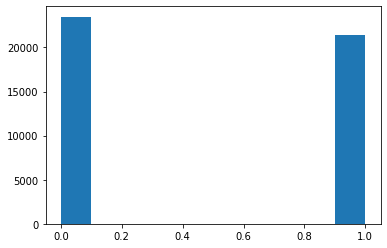

In [ ]:
plt.hist(df.category) #estan casi 50/50

In [ ]:
df.info() #veamos que no haya NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44898 non-null  object
 1   text      44898 non-null  object
 2   subject   44898 non-null  object
 3   date      44898 non-null  object
 4   category  44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


[Text(0, 0, 'politics'),
 Text(0, 0, 'worldnews'),
 Text(0, 0, 'News'),
 Text(0, 0, 'left-news'),
 Text(0, 0, 'politicsNews'),
 Text(0, 0, 'Government News'),
 Text(0, 0, 'Middle-east'),
 Text(0, 0, 'US_News')]

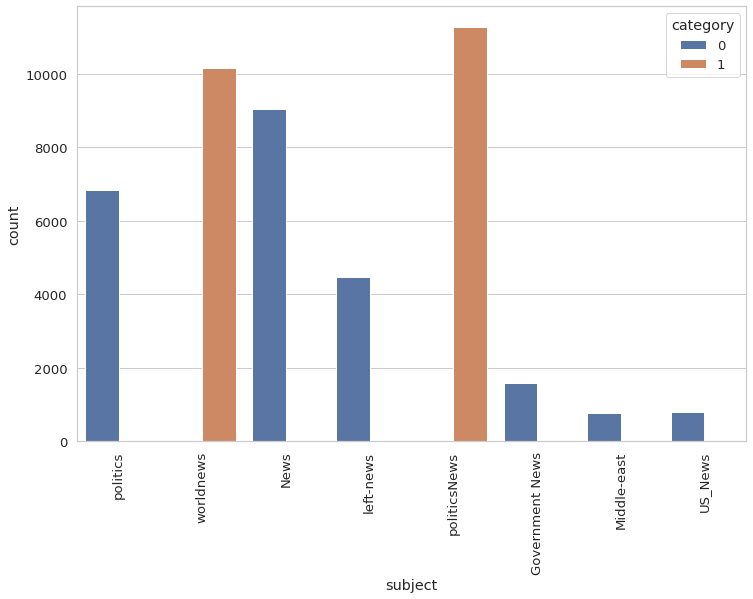

In [ ]:
plt.figure(figsize = (12,8))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "subject", hue = "category" , data = df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
#Haacemos una grafica por subjetct de la noticia y coloreando para identificar si es verdadera o no

In [ ]:
#Como hay una clara relación entre el subject y la veracidad vamos a eliminar esa columna
#Vamoa reducir todo a 2 columnas, incluimos el titulo en el texto y otra columna tendra la informacion de veracidad
df['text'] = df['text'] + " " + df['title']
del df['title']
del df['subject']
del df['date']

In [ ]:
#Vamos a quitar las spot words como the, to, of, and,a,in,that,on,for,s

stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#quitamos algunas cosas que podrian molestar
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# quitamos URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#aqui quitamos las stopwords basandonos en el set stop
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
# juntamos todo en esta ultima funcion
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

In [ ]:
#Aplicamos lo anterior
df['text']=df['text'].apply(denoise_text)

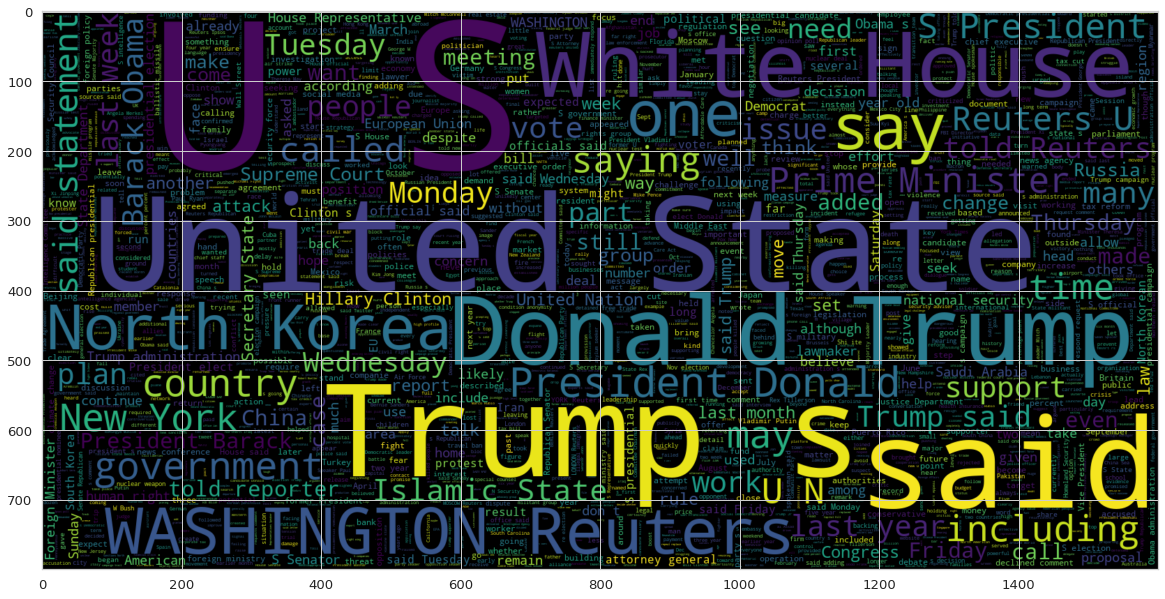

In [ ]:
#Algo muy interesante que enocntre en el notebook fue como hacer WordClouds para visualizar las palabras mas recurrentes en un texto
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.category == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

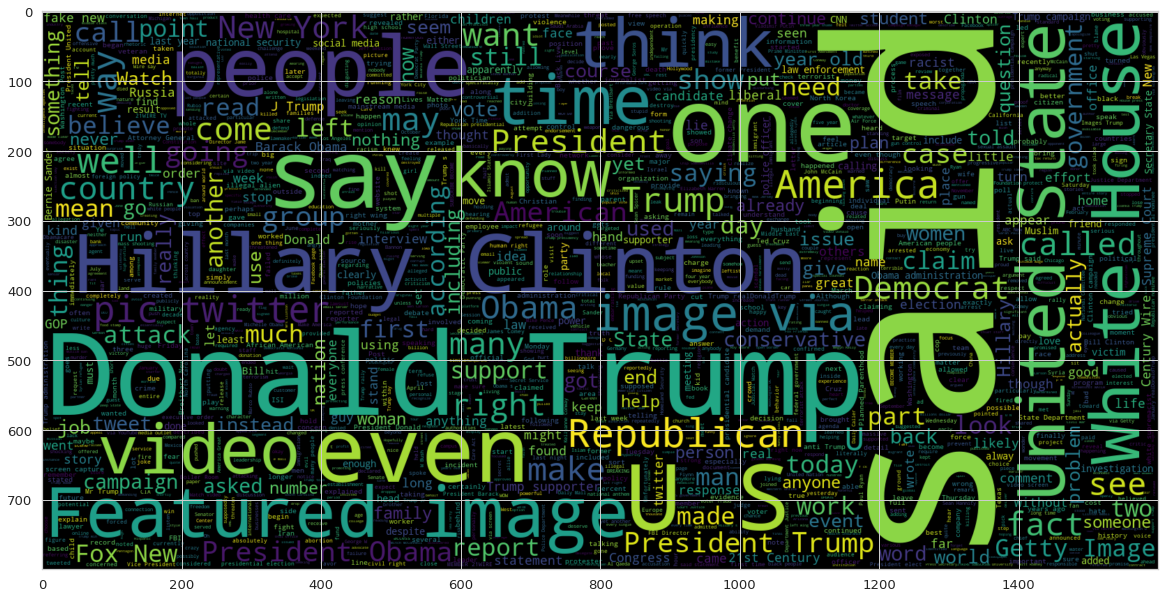

In [ ]:
#World cloud con las palabras mas comunes en las noticias falsas
plt.figure(figsize = (20,20)) # Text that is Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.category == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

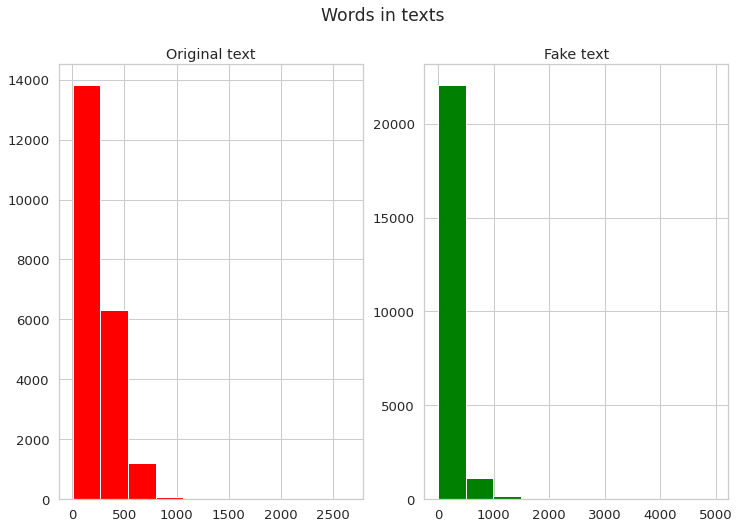

In [ ]:
#Histogramas por numero de palabras
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['category']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Original text')
text_len=df[df['category']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Words in texts')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.

Text(0.5, 0.98, 'Average word length in each text')

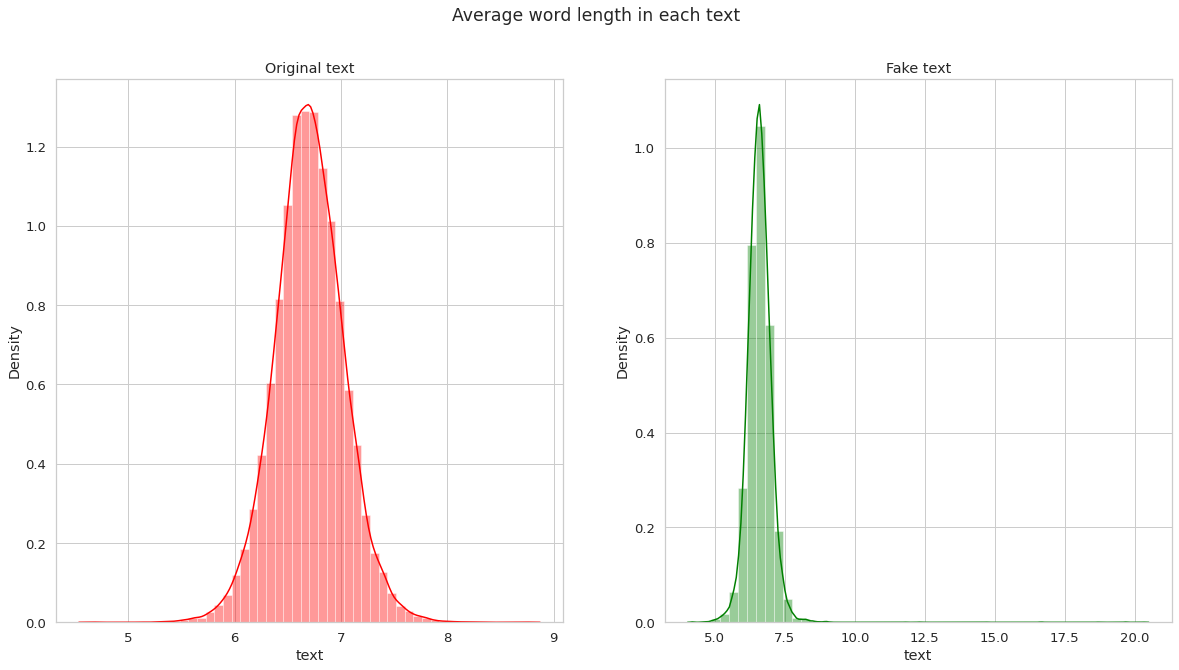

In [ ]:
#nuemro de palabras promedio en el texto
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=df[df['category']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Original text')
word=df[df['category']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Fake text')
fig.suptitle('Average word length in each text')

In [ ]:
#Podemos tomar todas las palabras, el corpus es un nombre generico utilizado para la agrupacion de todas las
#palabras por separado, esta pequeña funcion genera el corpus

def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():         #Cada texto lo difidimos en sus palabras y las agregamos al corpus
            words.append(j.strip())
    return words
corpus = get_corpus(df.text)
corpus[:10]

['Tyra',
 'Trump',
 'lets',
 'rip',
 'biased',
 'media',
 'tells',
 'everyone',
 'STOP',
 'listening']

In [ ]:
#Elegmios las mas comunes de todas esas palabras y mostramos el numero de veces encontrada con una simple funcion
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common) #lo hacemos un diccionario
most_common

{'Trump': 111503,
 'said': 93162,
 'would': 54613,
 'U.S.': 50441,
 'President': 33180,
 'people': 33115,
 'also': 30325,
 'one': 29370,
 'Donald': 27795,
 'said.': 26194}

Algo recurrente en los notebooks de NLP es la clase CountVectorizer
A grandes rasgos lo que hace similar a la representacion one-hot
Pero con palabras



---



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpusex = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',
 ]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpusex)
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [ ]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [ ]:
#Se puede hacer el mismo proceso pero haciendo que se identifiquen secuencias de
#2 palabras o mas

vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X2 = vectorizer2.fit_transform(corpusex)
vectorizer2.get_feature_names_out()

array(['and this', 'document is', 'first document', 'is the', 'is this',
       'second document', 'the first', 'the second', 'the third',
       'third one', 'this document', 'this is', 'this the'], dtype=object)

In [ ]:
print(X2.toarray())

[[0 0 1 1 0 0 1 0 0 0 0 1 0]
 [0 1 0 1 0 1 0 1 0 0 1 0 0]
 [1 0 0 1 0 0 0 0 1 1 0 1 0]
 [0 0 1 0 1 0 1 0 0 0 0 0 1]]


In [ ]:
#con dicha clase hacemos graficas de barras para identificar plabras o frases mas frecuentes
#esta funcion traduce las representaciones y suma la cntidad que estas aparecen

def get_top_text_ngrams(corpus, n, g): #n= numero de barras g= numnero de palabras en secuencia
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus) #El corpus ya lo obtuvimos antes
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

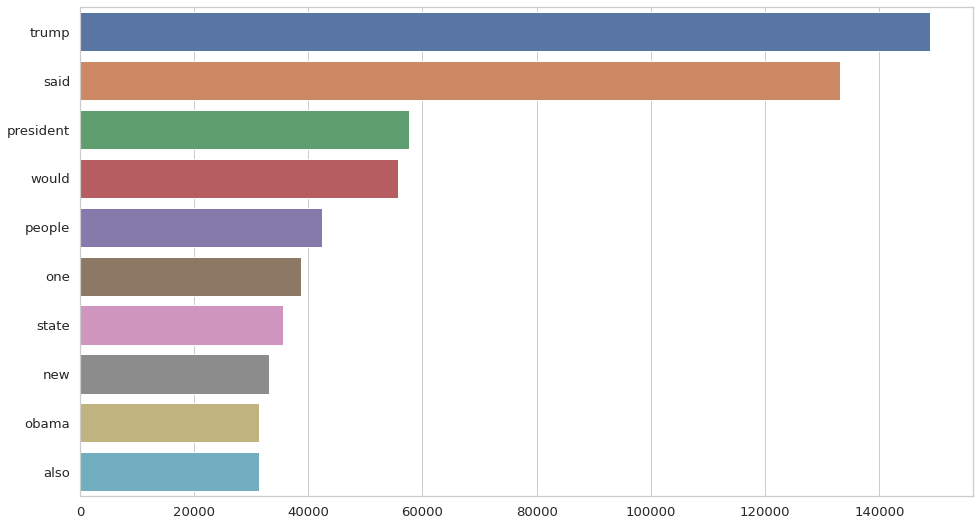

In [ ]:
#De manera grafica ponemos las palabras y secuencias de palabras mas comunes
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df.text,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

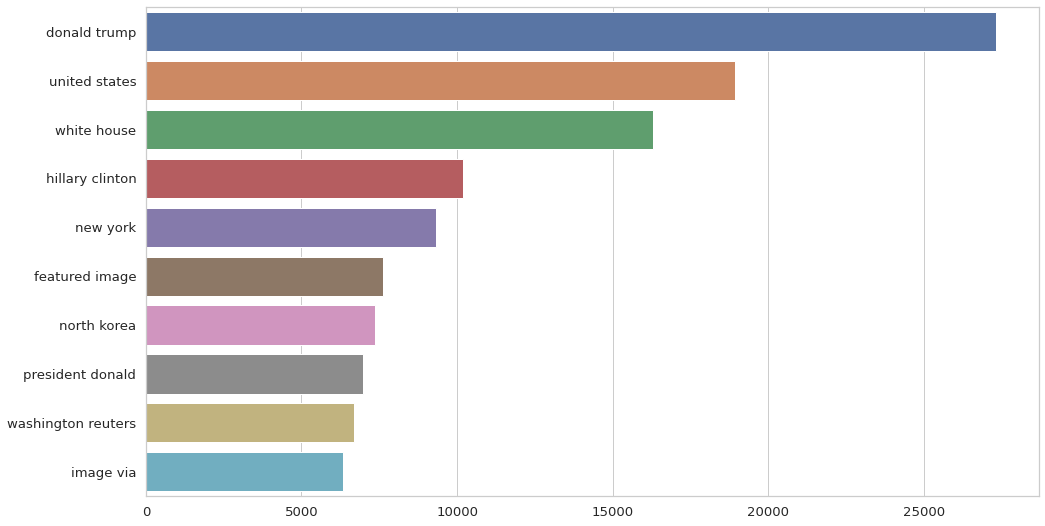

In [ ]:
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(df.text,10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))

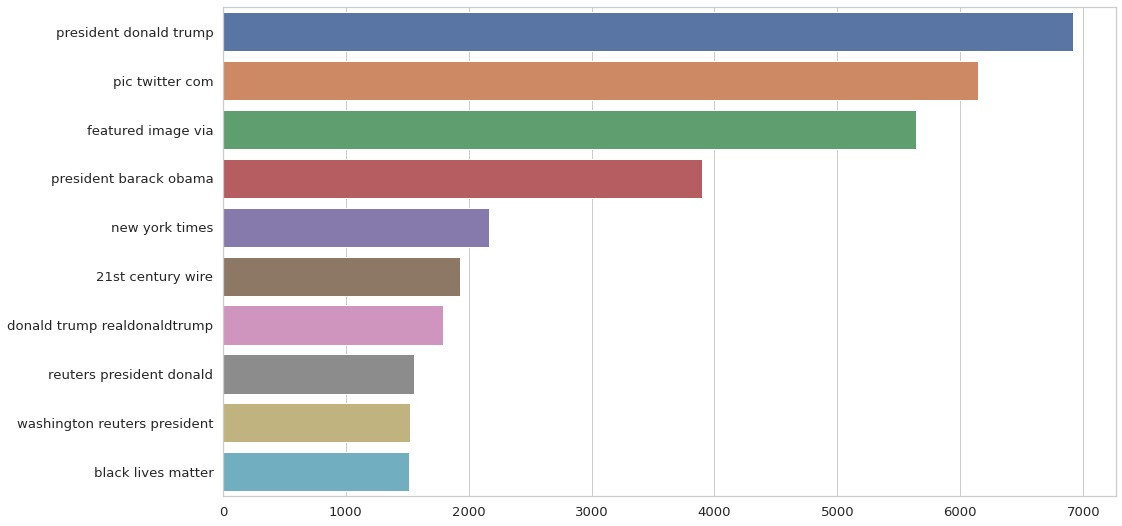

In [ ]:
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(df.text,10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))

3.- Prepacion de los datos


---



In [ ]:
#Definimos los set de datos, antes ya los "normalizamos" para poder hacer la graficas
X_train,X_test,y_train,y_test = train_test_split(df.text,df.category,random_state = 0)


In [ ]:
#Aqui vamos a asignar tokens a las palabras
max_vocab = 10001
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(X_train)

***Tambien es bueno aclarar un pcoo lo que paso aqui, veamos un ejemplo mas simples***


---



In [ ]:
#########
sentences = [
    'i love my dog',
    'I, love my cat',
    'You love my dog!'
]

tokenizer = Tokenizer(num_words = 1+1) #numero max +1
tokenizer.fit_on_texts(sentences)
tokenizer.texts_to_sequences(sentences)

[[1], [1], [1]]

Aqui solo se toma en cuenta 1 palabra mas comun , el arreglo que se obtiene esta separado por cada string, la palabra mas comun es love tiene el indice 1 y es lo unico que aparece

In [ ]:
##########
tokenizer = Tokenizer(num_words = 1001)
tokenizer.fit_on_texts(sentences)
tokenizer.texts_to_sequences(sentences)

[[3, 1, 2, 4], [3, 1, 2, 5], [6, 1, 2, 4]]

En cambio aqui todas las palabras son "mapeadas" love=1, my=2, i=3, dog=4, cat=5 you=6, se cuentan las 1000 palabras mas comunes solamente

In [ ]:
############
tokenizer = Tokenizer(num_words = 1)  # 1 no se obtenie nada y con 2 solo se considera una palabra
tokenizer.fit_on_texts(sentences)
tokenizer.texts_to_sequences(sentences)

[[], [], []]

***Volvemos a las fake News***

---



In [ ]:
#Aplicamos Tokenizer a los datasets
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post', maxlen=256)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post', maxlen=256)

4.-Red neuronal
work in progress
ya habia implementado otra red neuronal y habia adaptado todo para ponerlo en una funcion pero algunas dificultades se presnetaron, por ello lo unico aqui es absado completamente en el notebook de referencia

Aun estoy consultando y entendiendo mas de las RNN, en particular queiro utilizar los layers LSTM para el modelo

---



***Antes que nada algo de contexto de los layers***

1.   Embedding: Recibe numeros enteros positivos (indices) y los trasforma en dense vectors, es una alternativa a la representacion one hot, es mas eficiente en este caso por el numero de palabras, asigna representaciones similares para palabras similares, al inicio tiene valores arbitrarios pero va aprendiendo con la red neuronal.

2.   RNN: Recurrent nural network como su nombre lo dice, este tipo de red es recurrente, o dicho en otras palabras puede regresar y buscar informacion en otras instancias de la red. Estas redes tienen un "loop" dentro, un problema de estas redes se presenta cuando cuando la red se alarga y el aprendizaje podia fallar sin embargo las LSTM solucionan esto.


<img src="./images/RNN.png" width=400 height=1000 >

3.   LSTM: Long short term Mermory networks, son un subtipo de RNN que fueron diseñadas para reolver la dependencia de largo termino de las RNN basicas


<img src="./images/LSTM.png" width=400 height=1000 >

En este caso hay 4 capas densas que son utilizadas para ingresar información de manera opcional, la primera de ellas con una sigmoide como función de activación decide qué información. no es de utilidad para instancias posteriores del cell state arroja valores entre 0 y 1, la siguiente capa decide que nueva información entrara, está compuesta por una sigmoide y una tanh, la primera decide que información se actualizará y la segundo se encarga de crear los reemplazos. Finalmente la tercera puerta decide el output, la cpa sigmoide que partes del cell state saldrán al output y la tanh funciona como filtro para obtener solo lo que se decidió anteriormente

4.   Bidirectional: Hasta ahora el metodo de aprenizaje es "lineal", una predicción solo depende de los eventos pasados y presentes, sin embargo hay una manera de tomar el pasado, presente y el futuro para realizar una prediccion, basicamente se generan 2 caminos uno que va desde la ingesta de datos a un final y una que toma el camino de regreso


<img src="./images/BRNN.png" width=400 height=1000 >


para mas info http://colah.github.io/posts/2015-08-Understanding-LSTMs/

In [ ]:
def architecture2(activation):
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Embedding(max_vocab, 256)) #elegimos el numero de palbaras y el tamaño del vector #GloVe pretraining word ebeddimg
    #mas de 256 se vuelve muy extremo el entrenamiento
    model.add(tf.keras.layers.LSTM(128,  return_sequences=True))
    model.add(tf.keras.layers.LSTM(64))

    model.add(tf.keras.layers.Dense(32, activation=activation))

    model.add(tf.keras.layers.Dense(16, activation=activation))


    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Dense(1))

    return model

In [ ]:
activation = 'relu'
model_NLP = architecture2( activation='relu')

In [ ]:
model_NLP.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 256)         2560256   
                                                                 
 lstm_16 (LSTM)              (None, None, 128)         197120    
                                                                 
 lstm_17 (LSTM)              (None, 64)                49408     
                                                                 
 dense_24 (Dense)            (None, 32)                2080      
                                                                 
 dense_25 (Dense)            (None, 16)                528       
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_26 (Dense)            (None, 1)                

In [ ]:
#HACEMOS UN EARLY STOP PARA AHORRAR UN POCO DE TIEMPO
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

model_NLP.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])



In [ ]:
import time
epochs = 10
start_time = time.time()
val_split=0.1
history_model = model_NLP.fit(X_train, y_train,
                          epochs=epochs,
                          batch_size=32,
                          validation_split=val_split,
                          shuffle=True,
                          verbose=1, callbacks=[early_stop])

end_time = time.time()
print("Time for training: {:10.4f}s".format(end_time - start_time))

Epoch 1/10
948/948 [==============================] - 32s 30ms/step - loss: 0.3556 - accuracy: 0.8406 - val_loss: 0.4430 - val_accuracy: 0.8510
Epoch 2/10
948/948 [==============================] - 25s 26ms/step - loss: 0.3131 - accuracy: 0.8841 - val_loss: 0.2301 - val_accuracy: 0.8860
Epoch 3/10
948/948 [==============================] - 25s 26ms/step - loss: 0.2465 - accuracy: 0.9205 - val_loss: 0.1461 - val_accuracy: 0.9602
Epoch 4/10
948/948 [==============================] - 25s 27ms/step - loss: 0.2321 - accuracy: 0.9228 - val_loss: 0.2075 - val_accuracy: 0.9252
Epoch 5/10
948/948 [==============================] - 25s 26ms/step - loss: 0.1878 - accuracy: 0.9464 - val_loss: 0.0927 - val_accuracy: 0.9783
Epoch 6/10
948/948 [==============================] - 25s 26ms/step - loss: 0.1196 - accuracy: 0.9664 - val_loss: 0.0690 - val_accuracy: 0.9825
Epoch 7/10
948/948 [==============================] - 25s 27ms/step - loss: 0.0816 - accuracy: 0.9804 - val_loss: 0.0583 - val_accuracy:

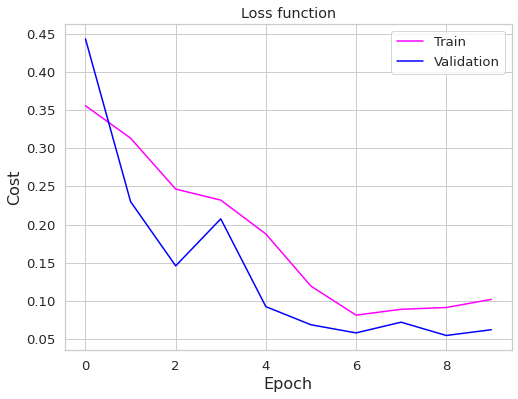

In [ ]:
#Graficamos las perdidas
plt.figure(figsize=(8,6))

plt.plot(history_model.history['loss'], 'magenta')
plt.plot(history_model.history['val_loss'], 'blue')
plt.title('Loss function')
plt.ylabel('Cost', size=16)
plt.xlabel('Epoch', size=16)
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

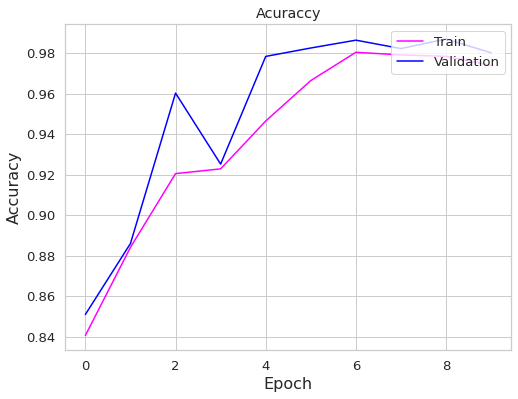

In [ ]:
#y Gaficamos Accuracy
plt.figure(figsize=(8,6))

plt.plot(history_model.history['accuracy'], 'magenta')
plt.plot(history_model.history['val_accuracy'], 'blue')
plt.title('Acuraccy')
plt.ylabel('Accuracy', size=16)
plt.xlabel('Epoch', size=16)
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
#Nota, al no quitar las stopwords la eficiencia disminuye pero no demasiado, en las pruebas obtuve entre 38-4o "falsos positivos"
model_NLP.evaluate(X_test, y_test)

351/351 [==============================] - 4s 12ms/step - loss: 0.0751 - accuracy: 0.9784


[0.07506370544433594, 0.9784409999847412]

5.- Predicciones

---



In [ ]:
pred = model.predict(X_test)

binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0)

351/351 [==============================] - 4s 11ms/step


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

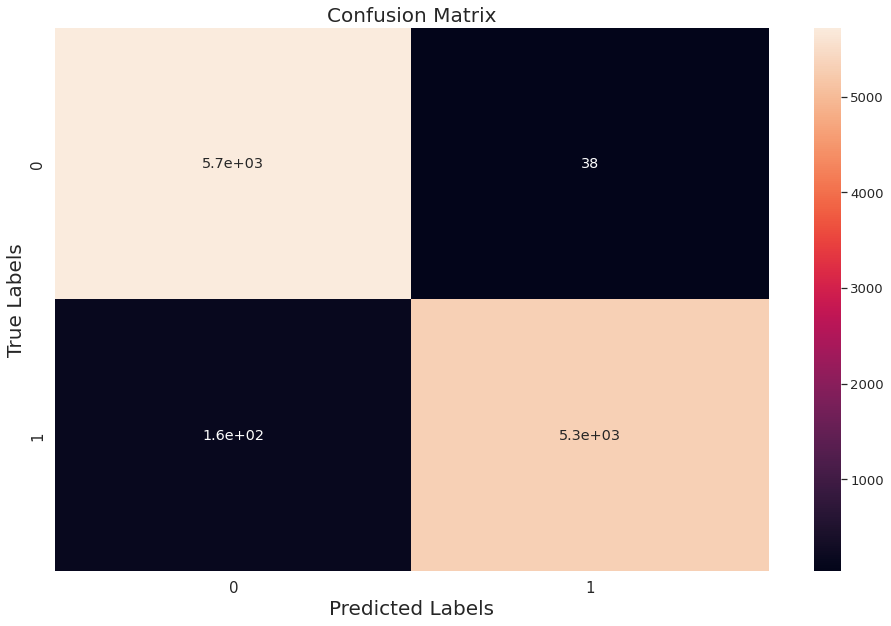

In [ ]:
matrix = confusion_matrix(binary_predictions, y_test)
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20)
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

***Modelo alternativo ***

In [ ]:
def architecture3(activation):
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Embedding(max_vocab, 256)) #elegimos el numero de palbaras y el tamaño del vector #GloVe pretraining word ebeddimg

    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,  return_sequences=True)))
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))

    model.add(tf.keras.layers.Dense(32, activation=activation))

    model.add(tf.keras.layers.Dense(16, activation=activation))


    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Dense(1))

    return model

In [ ]:
activation = 'relu'
model_NLPB = architecture3( activation='relu')

In [ ]:
model_NLPB.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 256)         2560256   
                                                                 
 bidirectional_4 (Bidirectio  (None, None, 256)        394240    
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_21 (Dense)            (None, 32)                4128      
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dropout_7 (Dropout)         (None, 16)               

In [ ]:
model_NLPB.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])


In [ ]:
import time
epochs = 10
start_time = time.time()
val_split=0.1
history_modelNLPB = model_NLPB.fit(X_train, y_train,
                          epochs=epochs,
                          batch_size=30,
                          validation_split=val_split,
                          shuffle=True,
                          verbose=1, callbacks=[early_stop])

end_time = time.time()
print("Time for training: {:10.4f}s".format(end_time - start_time))

Epoch 1/10
1011/1011 [==============================] - 58s 52ms/step - loss: 0.1590 - accuracy: 0.9359 - val_loss: 0.0139 - val_accuracy: 0.9967
Epoch 2/10
1011/1011 [==============================] - 45s 45ms/step - loss: 0.0304 - accuracy: 0.9964 - val_loss: 0.0350 - val_accuracy: 0.9923
Epoch 3/10
1011/1011 [==============================] - 49s 48ms/step - loss: 0.0160 - accuracy: 0.9989 - val_loss: 0.0186 - val_accuracy: 0.9970
Time for training:   151.8822s


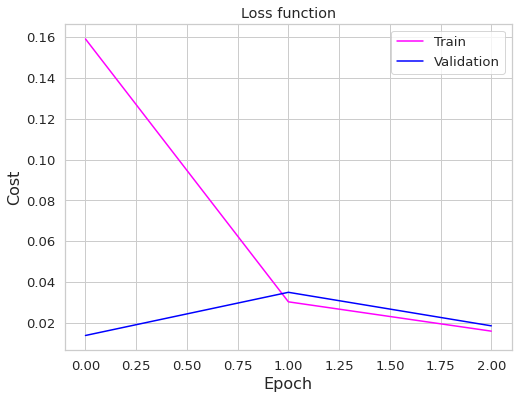

In [ ]:
#Graficamos las perdidas
plt.figure(figsize=(8,6))

plt.plot(history_modelNLPB.history['loss'], 'magenta')
plt.plot(history_modelNLPB.history['val_loss'], 'blue')
plt.title('Loss function')
plt.ylabel('Cost', size=16)
plt.xlabel('Epoch', size=16)
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

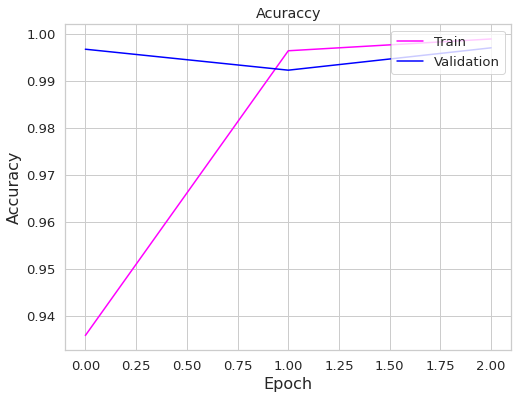

In [ ]:
plt.figure(figsize=(8,6))

plt.plot(history_modelNLPB.history['accuracy'], 'magenta')
plt.plot(history_modelNLPB.history['val_accuracy'], 'blue')
plt.title('Acuraccy')
plt.ylabel('Accuracy', size=16)
plt.xlabel('Epoch', size=16)
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
model_NLPB.evaluate(X_test, y_test)

351/351 [==============================] - 7s 21ms/step - loss: 0.0143 - accuracy: 0.9957


[0.014319943264126778, 0.9957238435745239]

351/351 [==============================] - 8s 20ms/step


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

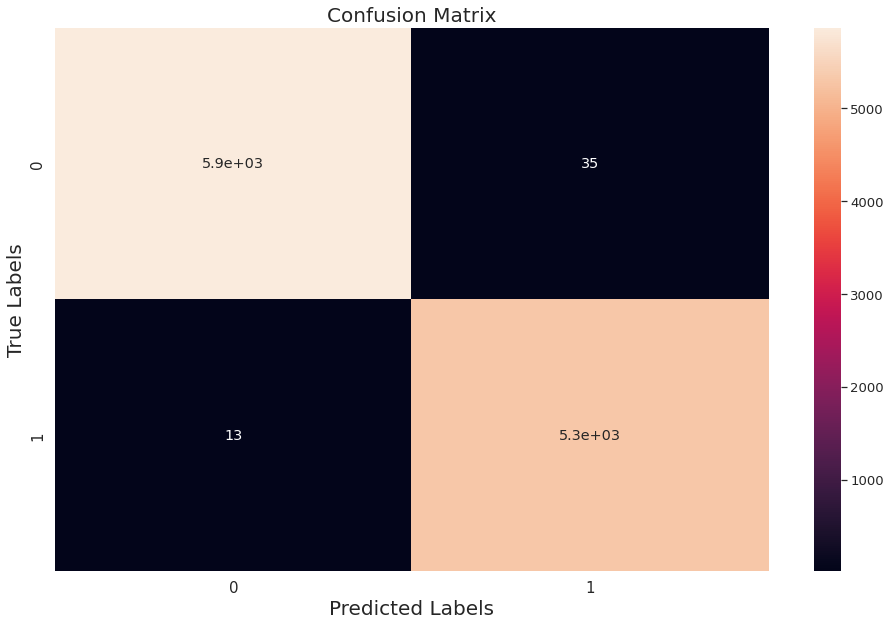

In [ ]:
pred = model_NLPB.predict(X_test)

binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0)

matrix = confusion_matrix(binary_predictions, y_test)
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20)
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

6.-Comentarios


---
El modelo funciona satisfactoriamente bastate bien, el poderr delas RNN es bastante grande aunque calro consume una cantidad de recursos imprtante, sin GPU cada epoca tardaria 10 minutos aproximadamnete, Otro factor que mejora el rendimiento es la integracion de redes bidireccionales

En general kas herramientas de NLP y los layers LSTM son bastante interesantes y tienen muchisimas aplicaciones interesantes.
